<a href="https://colab.research.google.com/github/Hari-Priya-18/Image-denoising/blob/main/band2_rad_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy matplotlib imageio


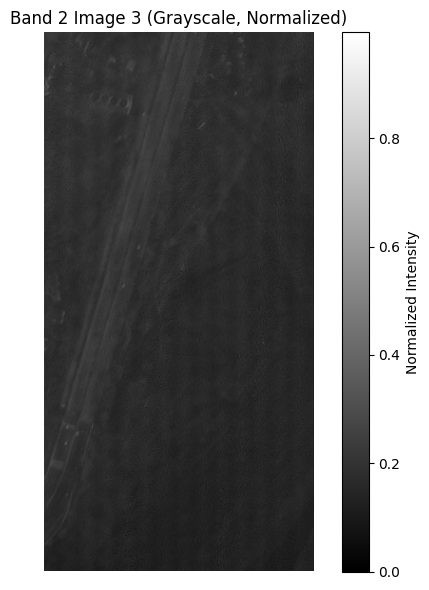

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Path to the .rad file
rad_file_path = '/content/band2_image3.rad'

# Read binary .rad image data (assume 8-bit grayscale)
with open(rad_file_path, 'rb') as f:
    image = np.fromfile(f, dtype=np.uint8)

# Reshape to 2D (try 1024x512 based on array size; update if needed)
try:
    image = image.reshape((1024, 512))
except ValueError:
    try:
        image = image.reshape((512, 1024))
    except ValueError:
        raise ValueError(f"Could not reshape array of size {image.size} into (1024, 512) or (512, 1024). Please confirm the actual dimensions (rows x cols) of the image data.")


# Normalize the image to 0–1 for visualization
image_normalized = image / 255.0

# Display the image using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(image_normalized, cmap='gray')
plt.title('Band 2 Image 3 (Grayscale, Normalized)')
plt.colorbar(label='Normalized Intensity')
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
pip install opencv-python scikit-image matplotlib


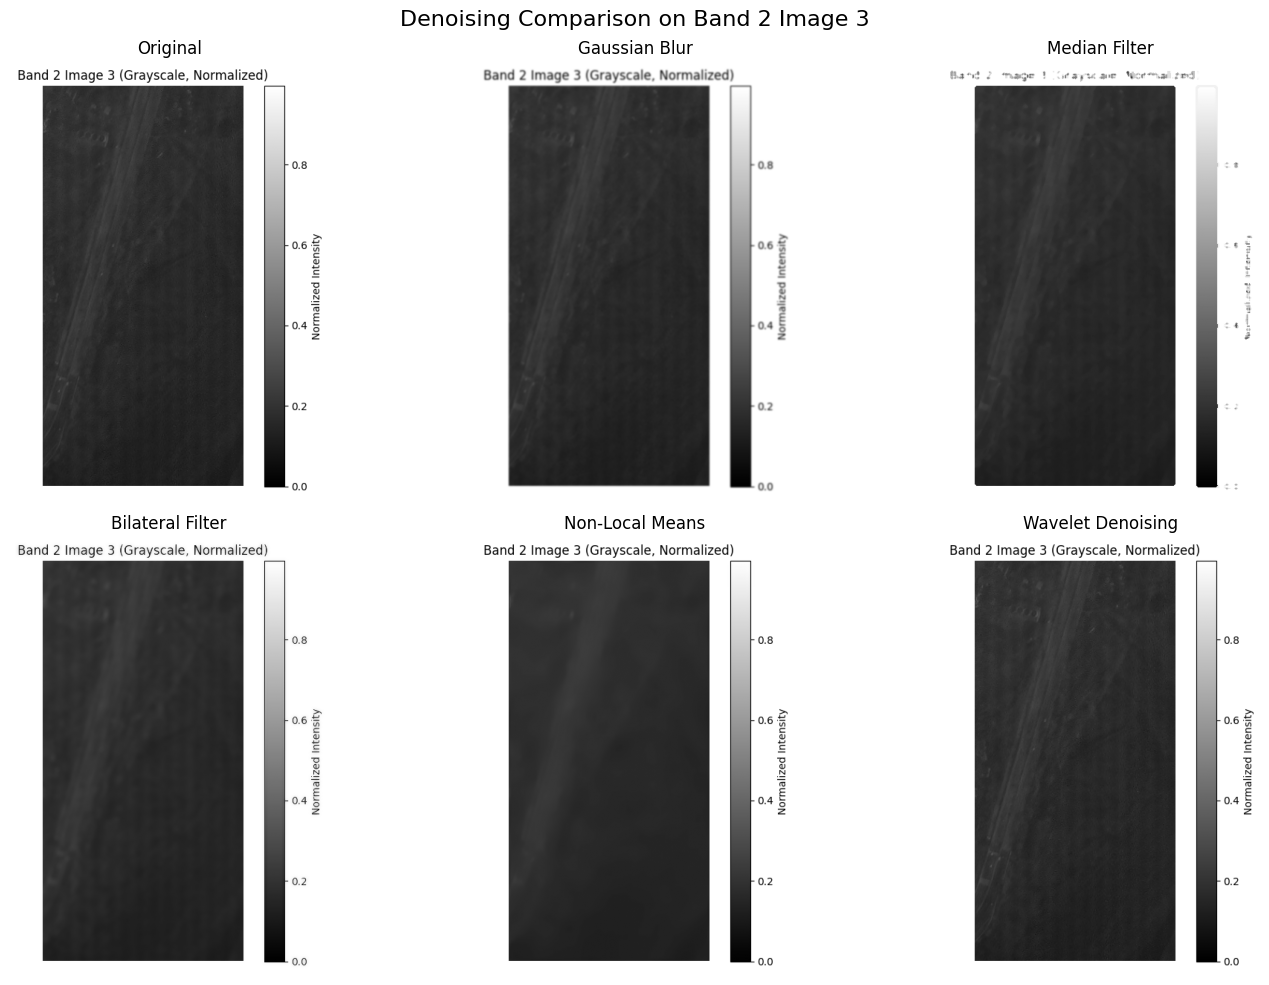

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, restoration, img_as_float
from skimage.util import random_noise

# Load the image (grayscale)
image_path = '/content/band2_rad_3.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = img_as_float(image)

# ------------------ Denoising Techniques ------------------

# 1. Gaussian Blur
gaussian = cv2.GaussianBlur(image, (5, 5), 1)

# 2. Median Filter
median = cv2.medianBlur((image * 255).astype(np.uint8), 5)

# 3. Bilateral Filter
bilateral = cv2.bilateralFilter((image * 255).astype(np.uint8), 9, 75, 75)

# 4. Non-Local Means Denoising
nl_means = cv2.fastNlMeansDenoising((image * 255).astype(np.uint8), h=10)

# 5. Wavelet Denoising
wavelet = restoration.denoise_wavelet(image, method='BayesShrink', mode='soft', rescale_sigma=True)

# ------------------ Visualization ------------------

titles = ['Original', 'Gaussian Blur', 'Median Filter', 'Bilateral Filter', 'Non-Local Means', 'Wavelet Denoising']
images = [image, gaussian, median / 255.0, bilateral / 255.0, nl_means / 255.0, wavelet]

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.suptitle('Denoising Comparison on Band 2 Image 3', fontsize=16)
plt.tight_layout()
plt.show()


In [6]:
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage import img_as_float

# Ensure all images are in float format (0 to 1)
original = img_as_float(image)
gaussian = img_as_float(gaussian)
median = img_as_float(median / 255.0)
bilateral = img_as_float(bilateral / 255.0)
nl_means = img_as_float(nl_means / 255.0)
wavelet = img_as_float(wavelet)

# Calculate PSNR for each
psnr_values = {
    'Gaussian Blur': psnr(original, gaussian),
    'Median Filter': psnr(original, median),
    'Bilateral Filter': psnr(original, bilateral),
    'Non-Local Means': psnr(original, nl_means),
    'Wavelet Denoising': psnr(original, wavelet)
}

# Print PSNR values
print("PSNR (compared to original image):")
for method, value in psnr_values.items():
    print(f"{method}: {value:.2f} dB")


PSNR (compared to original image):
Gaussian Blur: 24.32 dB
Median Filter: 21.78 dB
Bilateral Filter: 34.75 dB
Non-Local Means: 41.44 dB
Wavelet Denoising: 77.05 dB
